# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("carsdataset.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
df.info

<bound method DataFrame.info of       Unnamed: 0                              Name    Location  Year  \
0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2              2                      Honda Jazz V     Chennai  2011   
3              3                 Maruti Ertiga VDI     Chennai  2012   
4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...          ...                               ...         ...   ...   
6014        6014                  Maruti Swift VDI       Delhi  2014   
6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017        6017                Maruti Wagon R VXI     Kolkata  2013   
6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       

In [6]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

# EDA

Check for missing values

In [7]:
print(df.isnull().sum())

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


In [8]:
# Convert 'Mileage', 'Engine', 'Power', and 'Seats' columns to numeric, forcing errors to NaN
df['Mileage'] = pd.to_numeric(df['Mileage'].str.replace(' km/kg', '').str.replace(' kmpl', ''), errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'].str.replace(' CC', ''), errors='coerce')
df['Power'] = pd.to_numeric(df['Power'].str.replace(' bhp', ''), errors='coerce')
df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce')


# Handle missing values

In [9]:
# Handling 'Mileage' - Filling with mean (numerical data)
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())

# Handling 'Engine' - Filling with mode (categorical data, although it represents a numerical value, mode is often useful for engine specifications)
df['Engine'] = df['Engine'].fillna(df['Engine'].mode()[0])

# Handling 'Power' - Filling with mean (numerical data)
df['Power'] = df['Power'].fillna(df['Power'].mean())

# Handling 'Seats' - Filling with median (numerical data with a reasonable range of values)
df['Seats'] = df['Seats'].fillna(df['Seats'].median())


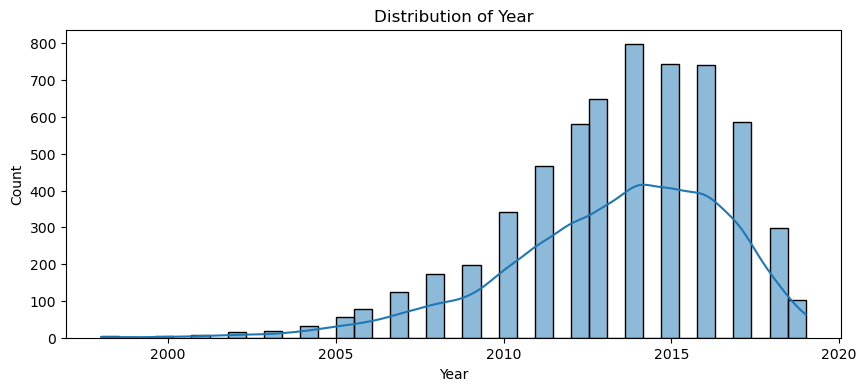

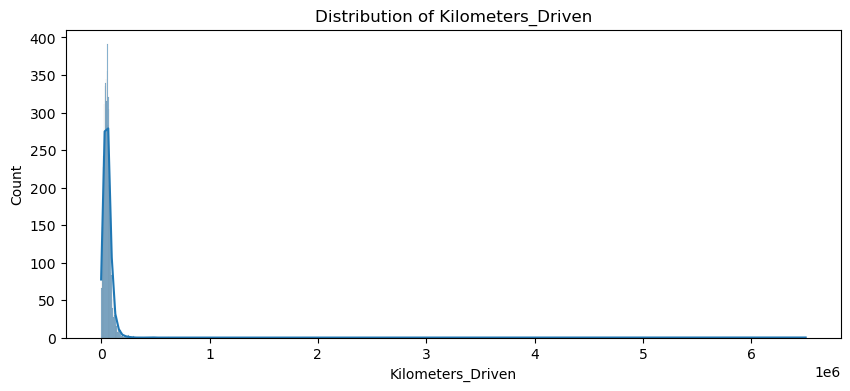

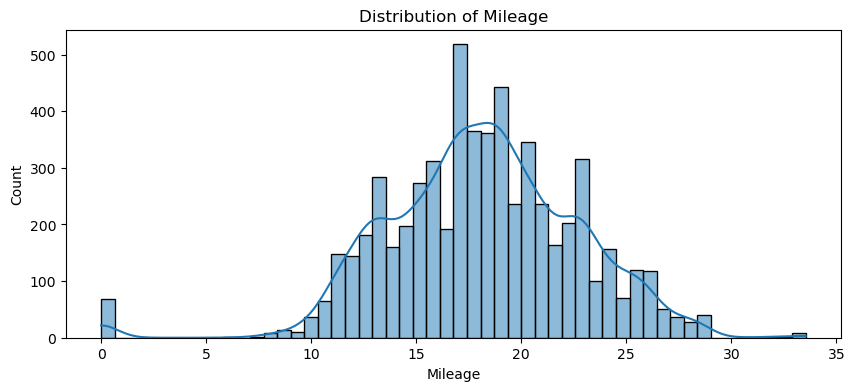

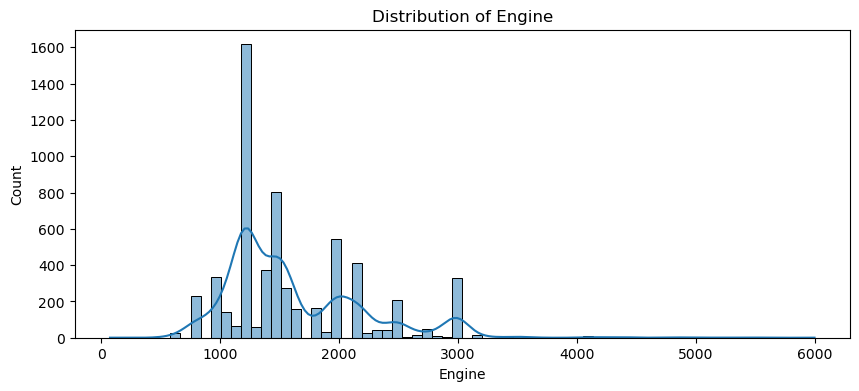

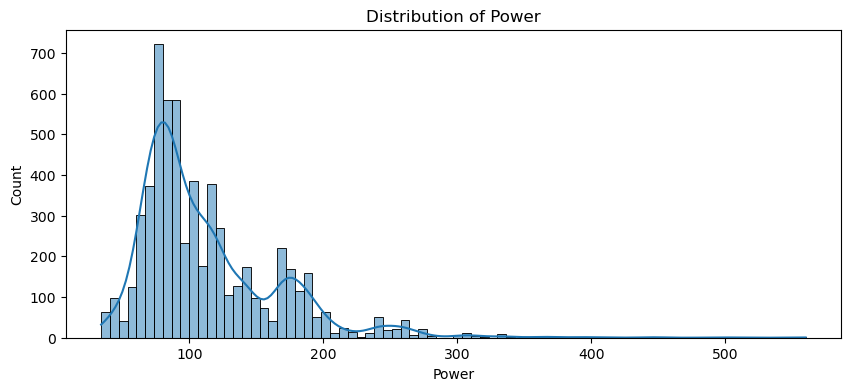

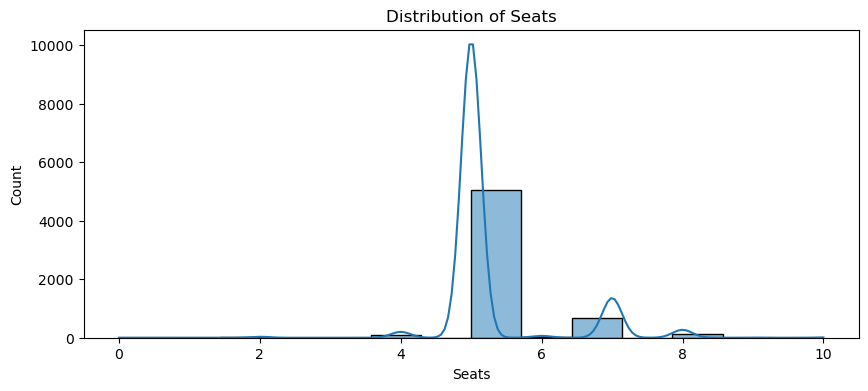

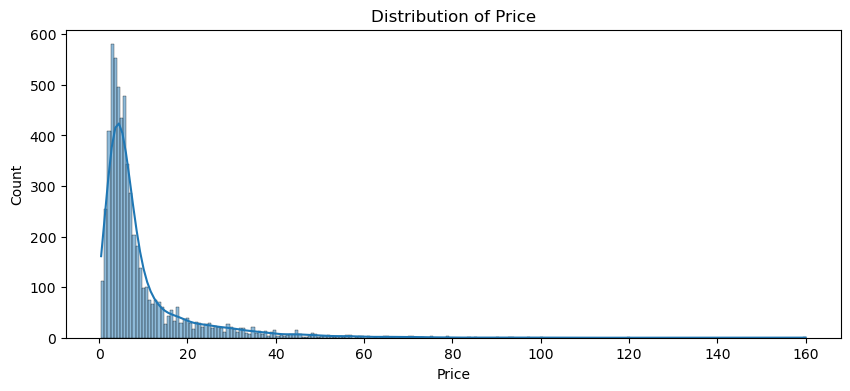

In [10]:
# Histogram for numerical columns
numerical_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

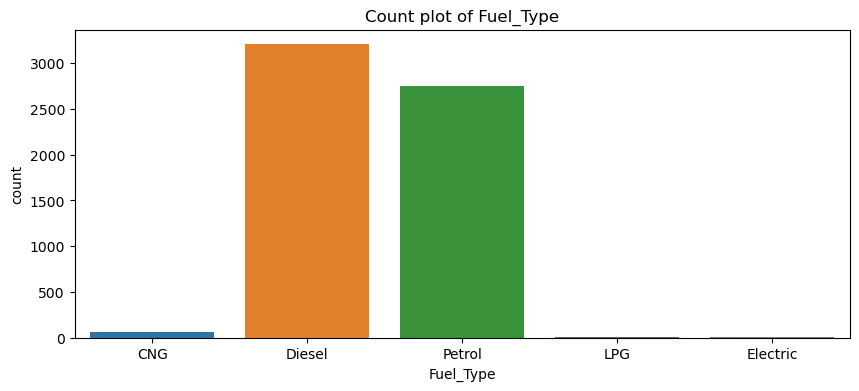

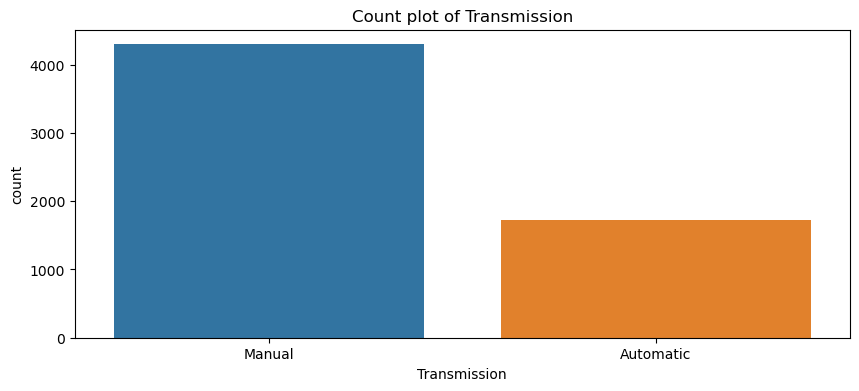

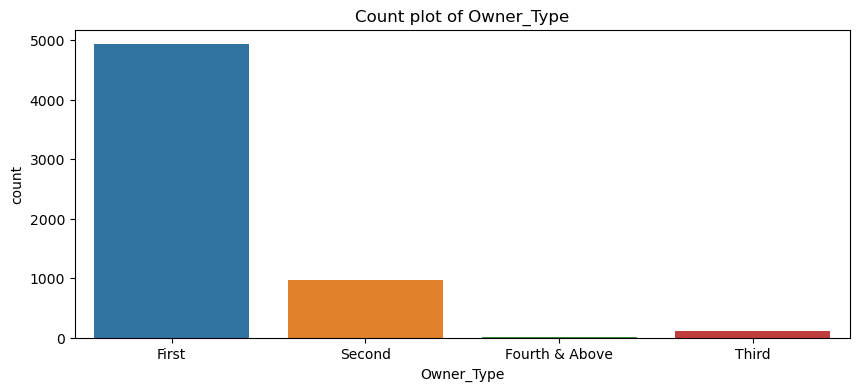

In [11]:
# Count plot for categorical columns
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type']

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[col])
    plt.title(f'Count plot of {col}')
    plt.show()

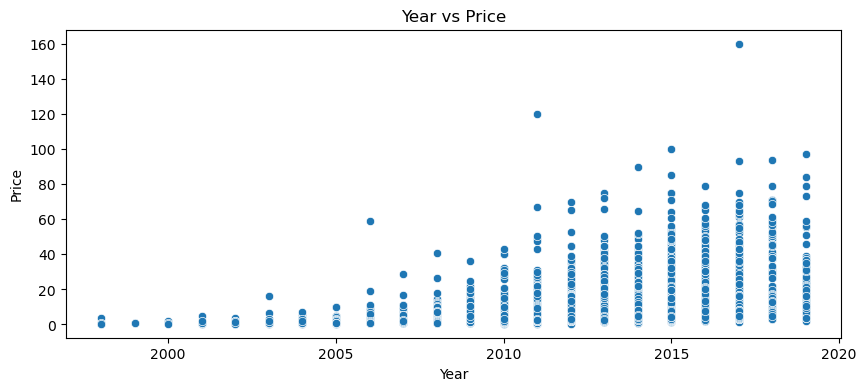

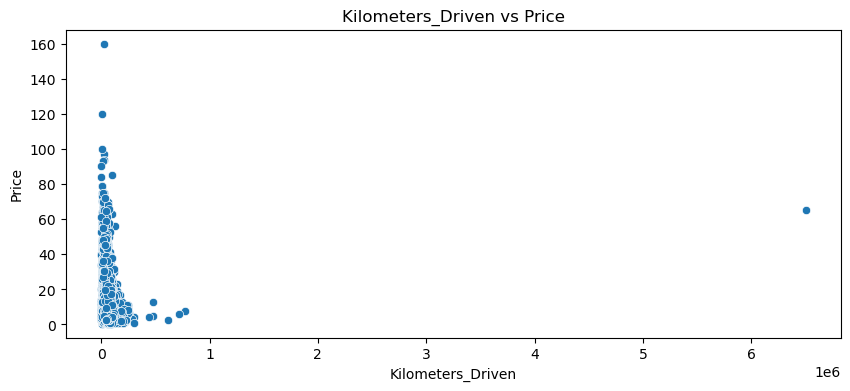

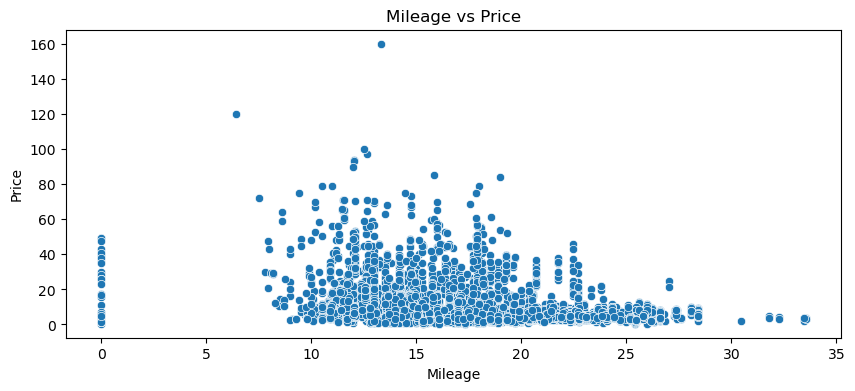

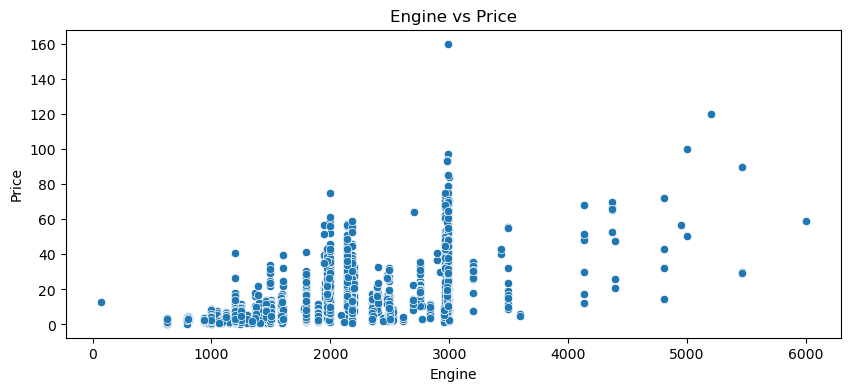

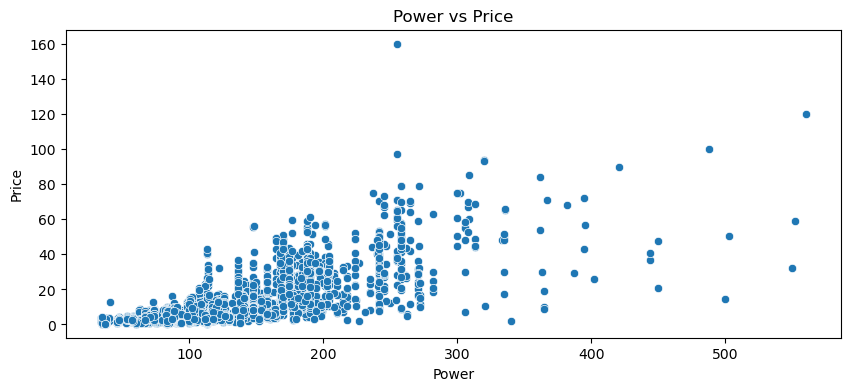

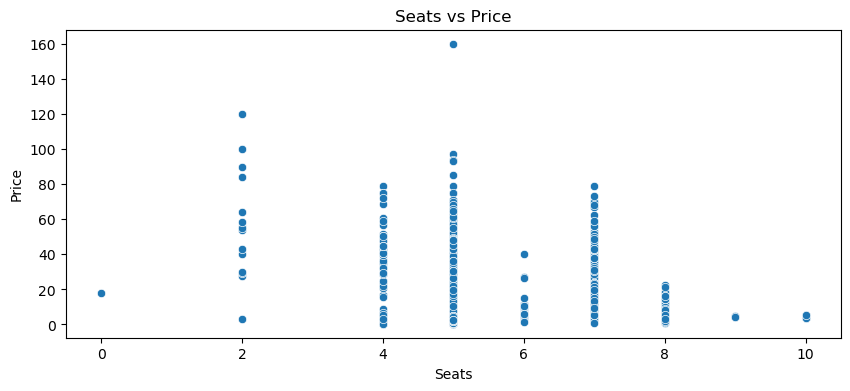

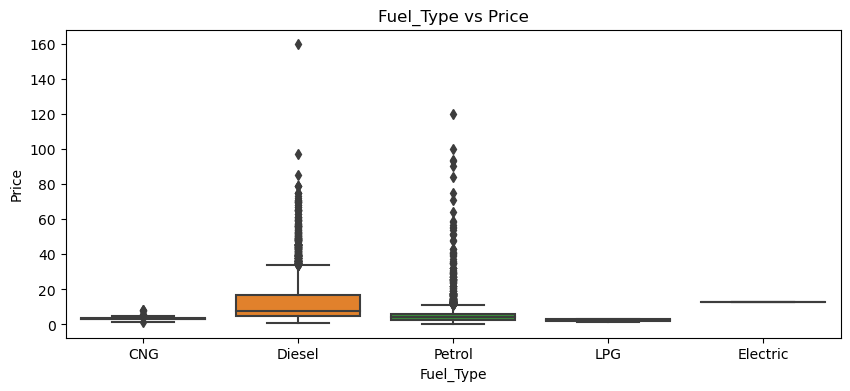

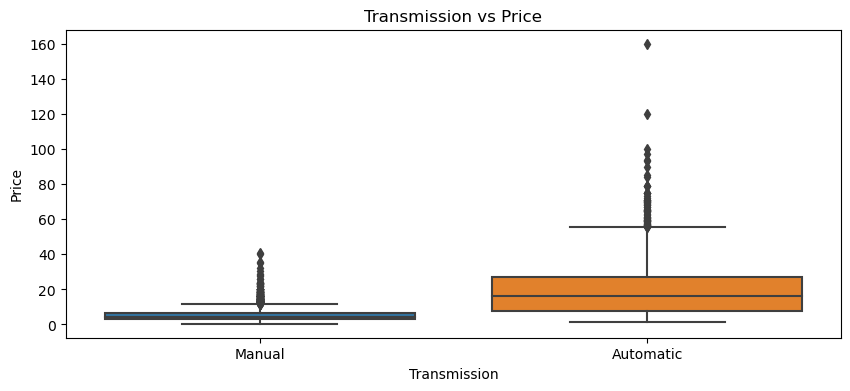

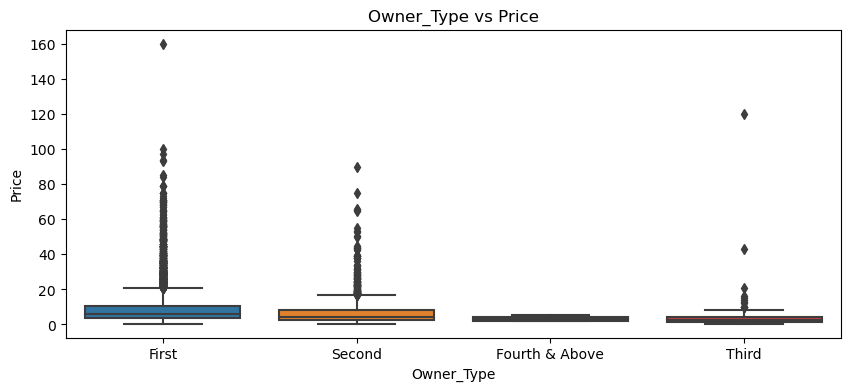

In [12]:
# Scatter plot for numerical columns against target variable 'Price'
for col in numerical_columns:
    if col != 'Price':
        plt.figure(figsize=(10, 4))
        sns.scatterplot(x=df[col], y=df['Price'])
        plt.title(f'{col} vs Price')
        plt.show()

# Box plot for categorical columns against target variable 'Price'
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], y=df['Price'])
    plt.title(f'{col} vs Price')
    plt.show()


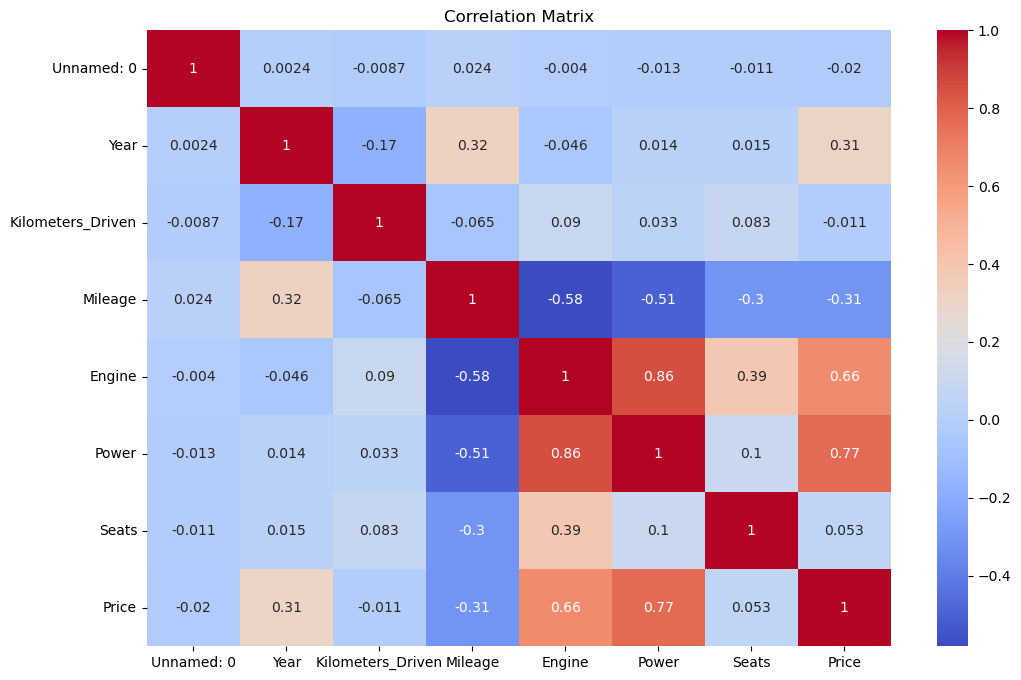

In [13]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[int, float])

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Encoding categorical variables
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Drop unnecessary columns

In [15]:
df = df.drop(columns=['Location', 'New_Price', 'Name'])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], 
                                                    df.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Standard scaling

In [17]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

# Linear Regression model

In [18]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.5644111589346881

# Random Forest Regressor model

In [19]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.8673919300929602